# Домашнее задание №1

## Подготовили студенты группы ФН4-11M:

### Дмитрюк Никита (программа, отчет)
### Насыров Артур (теор. выкладки, отчет)
### Ирина Москвина (отчет)

## Теоретическая часть

&nbsp; Идея конечно-разностного подхода для решения уравнений в частных производных опирается на методы аппроксимации
 производных, представленные в предыдущих частях данной лекции. В качестве примера мы будем рассматривать уравнение в частных производных *гиперболического типа* (более подробно о классификации уравнений в частных производных см.

\begin{equation}
    u_t = -a(x,t)u_x
\label{eq:ref}
\end{equation}

&nbsp; где $a(x,t)$ - функция, характеризующая скорость переноса скалярной величины $u(x,t)$, величина $t$ представляет
собой время, а $x$ - пространственную координату.

&nbsp; Уравнение типа $\eqref{eq:ref}$. называется *уравнением переноса* или *уравнением адвекции*.
 Нахождение численного решения уравнения такого типа представляет собой не простую и важную задачу вычислительной
  физики, так как оно встречается при моделировании широкого круга явлений в области геофизики, динамики газов,
   жидкостей и твердых тел, моделировании поведения плазмы, конвективного переноса тепла, концентраций примеси и
   других приложениях. На примере уравнения $\eqref{eq:ref}$ удобно проиллюстрировать основне принципы построения
    конечно-разностных методов, проанализировать их свойства и ограничения. При этом, представленные ниже подходы
    применимы и к другим уравнениям в частных производных, что делает их достаточно универсальным инструментом решения
     вычислительных задач.

 &nbsp; В случае, если в уравнении $\eqref{eq:ref}$ функция $a(x,t)$ равна постоянной величине $a$, уравнение называется
  "*линейным*" и для него можно построить аналитическое решение. Найдем это решение, оно пригодится нам далее для
   анализа численных результатов. Для этого выполним замену переменной: $\xi = x - at$. Тогда используя обозначение
   $u(x,t) = U(\xi,t)$ мы можем получить следующие формы записи производной по пространству и времени:

\begin{equation}
   \frac{\partial u}{\partial t} = \frac{\partial U}{\partial \xi}\frac{\partial \xi}{\partial t} +
    \frac{\partial U}{\partial t}\frac{\partial t}{\partial t} = - a\frac{\partial U}{\partial \xi} +
     \frac{\partial U}{\partial t}
\end{equation}

Подстановка этих выражений в $\eqref{eq:ref}$ преобразует его к обыкновенному дифференциальному уравнению:
  \begin{equation}
  \frac{\partial}{\partial t} U(\xi,t) = 0
\end{equation}


   Отсюда можно заключить, что $U$ не может быть функцией времени, но может быть произвольной функцией $\xi$.
     Таким образом, общим решением  $\eqref{eq:ref}$ будет:
\begin{equation}
        u = f(x-at)
\end{equation}

   где $f$ - произвольная функция, вид которой определяется начальными и граничными условиями. Пусть решение ищется в
    интервале $(-\infty,\infty)$, а в качестве начального условия задана функция $u(x,0)=F(x)$. Тогда частным решением,
     удовлетворяющим начальному условию будет
\begin{equation}
   u = F(x-at)
\end{equation}

Из данного решения можно видеть, что со временем вид функции $u(x,t)$ не меняется, а лишь переносится вправо
     (если $a>0$) со скоростью $a$.

К примеру, зададим начальное условие в виде гауссиана $F(x)=u_0e^{-x^2}.$ В таком случае, решением уравнения
  $\eqref{eq:ref}$ будет:
     
\begin{equation}
    u(x,t)=u_0e^{-(x-\alpha t)^2}
\end{equation}


метод конечных разностей

Для нахождения приближенного решения уравнений в частных производных конечно-разностным методом, используется
 дискретная система точек и так называемая расчетная сетка. Для уравнений, зависящих от одной пространственной
  координаты система точек представляет собой сетку в плоскости $(x,t)$. Шаг сетки по оси $x$ будем обозначать
   $\Delta x$, шаг сетки по оси$ t - \Delta t$. Таким образом, координата узла сетки на временном слое n с
    пространственным индексом $i$ будет равна $(i\Delta x,n\Delta t)$. Приближенное решение ищется в узлах данной сетки.
     Приближенное решение в узле сетки с индексами $(i,n)$ будем обозначать как $u_i^n$.   Процесс построения
      конечно-разностных схем будем рассматривать также на примере линейного уравнения переноса:
    \begin{equation}
    u_t = -au_x
 \label{eq:ref2}
\end{equation}
  На практике численнное решение уравнения $\eqref{eq:ref2}$ имеет смысл искать в ограниченной области пространства и
   времени $(x,t)\in G=[0,L]×[0,T]$. В таком случае, на границах расчетной области необходимо задать соответствующие
   условия:
   
\begin{equation}
    u(x,0)=\theta(x), x \in[0,L];
      u(0,t)=\psi(t)
      u(L,t)=\xi(t), t \in[0,T]
\end{equation}

В результате разбиения расчетной области на ячейки с шагом Δx по пространству и $\Delta t$ по времени мы получим
 $N=\frac{L}{\Delta x}$ ячеек по пространству (число узлов сетки при этом на 1 больше) и $M=\frac{T}{\Delta t}$ ячеек
  по времени, тогда:
  \begin{equation}
  u^0_i=\theta(x_i), i \in[0,N];
  u^n_0=\psi(t_n), n \in[0,M] ;
 u_N^n=\xi(t_n), n \in[0,M] ;
  \end{equation}

Необходимо найти значения функции в последующие моменты времени $\Delta t,2 \Delta t,3 \Delta t,... $во всех узлах сетки.


Существует несколько подходов к созданию конечно-разностных аналогов дифференциального уравнения (\ref{eq:ref2}).
 Простейший способ заключается в использовании конечно-разностного представления производных, входящих в уравнения.
  К примеру, производную по пространству можно заменить односторонними конечными разностями$ D_+(x), D_−(x)$ или
   центральной $D_0(x)$ конечной разностью. Аналогичным образом можно воспользоваться данными выражениями для нахождения
    производной по времени. К примеру, используя одностороннюю разность $ D_-(x)$ для производной по пространству и
     $ D_+(x)$ для производной по времени, получим следующий дискретный аналог дифференциальной задачи:
\begin{equation}
\frac{n_i^{n+1}-n_i^{n}}{\Delta x}=-a\frac{n_{i}^n-n_{i-1}^n}{\Delta t}
 \label{eq:ref3}
\end{equation}
Данная cхема называется схемой левый уголок. Её шаблон приведен на Рисунке 1а. Шаблоном называется множество узлов
 расчетной сетки, используемых для построения разностного оператора. Используя одностороннюю разность $ D_+(x)$ для
 производной по пространству и$ D_+(x)$ для производной по времени получим схему правый уголок (Рисунок 1б):
\begin{equation}
\frac{n_i^{n+1}-n_i^{n}}{\Delta x}=-a\frac{n_{i+1}^n-n_{i}^n}{\Delta t}
 \label{eq:ref4}
\end{equation}
Нахождение численного решения уравнения (\ref{eq:ref2}) на временном слое $n+1$ с помощью схемы $\eqref{eq:ref3}$
сводится к вычислению $u^{n+1}_i$ с использованием данных на предыдущем временном слое:
\begin{equation}
u_i^{n+1}=u_i^n-a\frac{\Delta t}{\Delta x}(u_{i+1}^n-u_{i}^n)
 \label{eq:ref5}
\end{equation}

 Схемы, в которых данные на новом временном слое $n+1$ можно найти только с использованием данных с предыдущего
  временного слоя $n$, называются явными.

  Заметим, что для вычисления $u^{n+1}_1$ нам необходимо использовать значение $u^n_0$, которое мы будем определять
   из граничного условия $u^n_0=\psi(t_n)$:
\begin{equation}
u_1^{n+1}=u_1^n-a\frac{\Delta t}{\Delta x}(u_{1}^n-u_{0}^n)
\end{equation}

## ПРАКТИЧЕСКАЯ ЧАСТЬ

### Постановка задачи

**Задание №1**. Интерполяционно-характеристическим методом получить конечно-разностную
схему с заданным шаблоном. Варианты шаблонов приведены на рисунке 1 на второй
странице.

**Задание №2**. Реализовать эту схему в программном коде с помощью произвольного языка
программирования для решения линейного уравнения переноса.

**Задание №3**. С помощью реализованной численной схемы провести расчет задачи Коши с
начальными и граничными условиями

**Задание №4**. Проанализировать используемую конечно-разностную схему. Определить
порядок точности, найти первое дифференциальное приближение, вывести
характеристическое уравнение, построить диссипативную и дисперсионную поверхности.

### Реализация

Одним из наиболее наглядных способов построения конечно-рaзностных схем является так называемый интерполяционно-характеристического метод или метод обратной характеристики. Схема построения интерполяционной фомулы продемонстрированан на рисунке 2:


Для построение интепрполяционной формулы нам нужны координаты точек $A$, $B$, которые имеют вид:
\begin{equation}
x_a=x_i-c\Delta x
 \label{eq:ref6}
\end{equation}
\begin{equation}
x_b=x_i+c\Delta x
 \label{eq:ref7}
\end{equation}

Используем квадаратичную интерполяцию для нахождения значения в точке $u(x_a,t_n)==u_i^{n+1}$:
\begin{equation}
u_i^{n+1}=u_{i-1}^{n}P_{i-1}(x_a)+u_{i}^{n}P_{i}(x_a)+u_{i}^{n-1}P_{b}(x_a)
 \label{eq:ref8}
\end{equation}
Где:
\begin{equation}
P_{i-1}(x_a)=\frac{(x_a-x_i)(x_a-x_b)}{(x_{i-1}-x_{i})(x_{i-1}-x_{b})}=\frac{2c^2}{1+c}=\frac{2a^2\Delta t^2}{\Delta x(\Delta x+a\Delta t)}
 \label{eq:ref9}
\end{equation}

\begin{equation}
P_{i}(x_a)=\frac{(x_a-x_{i-1})(x_a-x_b)}{(x_{i}-x_{i-1})(x_{i}-x_{b})}=2-2c=\frac{2(\Delta x -a\Delta t)}{\Delta x}
 \label{eq:ref10}
\end{equation}

\begin{equation}
P_{b}(x_a)=\frac{(x_a-x_{i-1})(x_a-x_i)}{(x_{b}-x_{i})(x_{b}-x_{i-1})}=-\frac{1-c}{1+c}=-\frac{\Delta x -a\Delta t}{\Delta x +a\Delta t}
 \label{eq:ref11}
\end{equation}


Тогда с учетом $\eqref{eq:ref9}$,$\eqref{eq:ref10}$,$\eqref{eq:ref11}$ уравнение $\eqref{eq:ref8}$ примет следующий вид:
\begin{equation}
u_i^{n+1}=\frac{2c^2}{1+c}u_{i-1}^{n} +(2-2c)u_{i}^{n} -\frac{1-c}{1+c}u_{i}^{n-1}
 \label{eq:ref12}
 \end{equation}
 
Или при подстановке $c=\frac{a\Delta t}{\Delta x}$ имеем:
\begin{equation}
\frac{u^{n+1}_{i}-u^{n-1}_{i}}{2\Delta t}+\frac{\Delta x}{2a} \frac{u^{n+1}_{i}-2u^{n}_{i}+u^{n-1}_{i}}{\Delta t^2}=a\frac{u^{n}_{i-1}-u^{n}_{i}}{\Delta x}
 \label{eq:ref13}
 \end{equation}


Решим с помощью полученной интепроляционной формулы уравнение $\eqref{eq:ref}$ со следующими начальными условиями:
\begin{equation}
    u_0=u_1exp[-\frac{x^2}{2}]+u_2exp[-\frac{(x-1)^2}{2}];u_1=1, u_2=2;
\end{equation}

С периодическими граничиными условиями:
  \begin{equation}
    u_0^{n+1}=u_{N}^n 
\end{equation}

 также решим и с граничными условиями типа "выток"
 \begin{equation}
    u_N^n=u_{N-1}^n 
\end{equation}
 

 Как видим решение с разрывными граничными условиями, приобретает локальные максимумы и минимумы. Что согласуются с  исследованиями С.К. Годунова 1959 года, о возникновение в решении новых локальных минимумов и максимумов при переходе на новый временной слой, при решении уравнений с разрывными начальными условиями. Максимумы и минимумы возникают т.к. интерполяционная схема, как будет показано далее, имеет второй порядок точности по $x$ и $t$, а согласно теореме Годунова, корректно решиить задачу с разрывом, может только монотонная схема имеющая только первый порядок точности.


## Исследование конечно раздностной схемы

Поговорим о точности разностной схемы .Ключевой идеей при определении точности конечно-разностной схемы является её разложение в ряд Тейлора.

  \begin{equation}
\epsilon^n_i=\frac{u^{n+1}_{i}-u^{n-1}_{i}}{2\Delta t}+\frac{\Delta x}{2a} \frac{u^{n+1}_{i}-2u^{n}_{i}+u^{n-1}_{i}}{\Delta t^2}-a\frac{u^{n}_{i-1}-u^{n}_{i}}{\Delta x}
\end{equation}

для определения ошибки аппроксимации, воспользуемся разложением в ряд Тейлора значений функции в окрестности точек $(x_i, t_{n+1})$,  $(x_i, t_{n-1})$, $(x_{i-1}, t_{n})$:

\begin{equation}
u^{n+1}_{i}=u^{n}_{i} + \frac{\partial u}{\partial t}\Delta t +  \frac{1}{2!}\frac{\partial^2 u}{\partial t^2}\Delta t^2 + \frac{1}{3!}\frac{\partial^3 u}{\partial t^3}\Delta t^3+...
\end{equation}

\begin{equation}
u^{n-1}_{i}=u^{n}_{i} - \frac{\partial u}{\partial t}\Delta t +  \frac{1}{2!}\frac{\partial^2 u}{\partial t^2}\Delta t^2 - \frac{1}{3!}\frac{\partial^3 u}{\partial t^3}\Delta t^3+...
\end{equation}

\begin{equation}
u^{n}_{i-1}=u^{n}_{i} - \frac{\partial u}{\partial x}\Delta x +  \frac{1}{2!}\frac{\partial^2 u}{\partial x^2}\Delta x^2 - \frac{1}{3!}\frac{\partial^3 u}{\partial x^3}\Delta x^3+...
\end{equation}

при подстановке, значений рядов Тейлора в формулу локальных ошибок 
\begin{equation}
    \epsilon^n_i= \frac{\partial u}{\partial t} + a \frac{\partial u}{\partial x} + \frac{\Delta x}{2a} \frac{\partial^2 u}{\partial t^2} -\frac{a}{2!}\frac{\partial^2 u}{\partial x^2}\Delta x+\frac{1}{3!}\frac{\partial^3 u}{\partial t^3}\Delta t^2+\frac{a}{3!}\frac{\partial^3 u}{\partial x^3}\Delta x^2
\end{equation}

С учетом того, что первые два слагаемых дают ноль, то дифференциальное приближение имеет вид

\begin{equation}
  G(\Delta x, \Delta t)= \frac{\Delta x}{2a} \frac{\partial^2 u}{\partial t^2} -\frac{a}{2!}\frac{\partial^2 u}{\partial x^2}\Delta x+\frac{1}{3!}\frac{\partial^3 u}{\partial t^3}\Delta t^2+\frac{a}{3!}\frac{\partial^3 u}{\partial x^3}\Delta x^2
\end{equation}
заменяя производную по времени соотношением:
\begin{equation}
  \frac{\partial^k u}{\partial t^k}=(-a)^k \frac{\partial^k u}{\partial x^k}
\end{equation}

Тогда дифференциальное приближение $G(\Delta x, \Delta t)$ примет следующую форму, которую мы будем называть $P$ - формой дифференциального приближения:
\begin{equation}
     P(\Delta x, \Delta t) = \frac{\partial^3 u}{\partial x^3}(\frac{a\Delta x^2}{3!}-\frac{a^3\Delta t^2}{3!})
\end{equation}

Степень $\Delta x$ и $\Delta t$ в первом дифференциальном приближении является порядком точности конечно-разностной схемы. Таким образом интепроляционная схема  Насыров-Дмитрюк имеет второй порядок точности по $x$ и $t$

## Дисперсионное соотношение

В общем виде дифференциальные приближения разных схем для уравнения переноса выглядят следующим образом:


\begin{equation}
    \frac{\partial u}{\partial t} + a \frac{\partial u}{\partial x} + \mu \frac{\partial^2 u}{\partial x^2} + \eta \frac{\partial^3 u}{\partial x^3}=0
\end{equation}
Запишем наше дифференциальное приближение и найдем, коэфициенты
\begin{equation}
    \frac{\partial u}{\partial t} + a \frac{\partial u}{\partial x} + \frac{\partial^3 u}{\partial x^3}(\frac{a\Delta x^2}{3!}-\frac{a^3\Delta t^2}{3!})=0
\end{equation}
Сравнивая два выражения, нетрудно сделать вывод что $\mu = 0$. Cледовательно амплитуда не изменяется, коэфициент $\eta =(\frac{a\Delta x^2}{3!}-\frac{a^3\Delta t^2}{3!})$

Вставим а дифференциальное приближение проблную функцию $u(x, t) = Aexp[i(\omega t - kx)]$ тогда:
\begin{equation}
    \omega - ak + \eta k^3 = 0;
\end{equation}
Выразим $\omega$
\begin{equation}
    \omega = ak - \eta k^3;
\end{equation}

Тогд приведенная фазовая скорость будет равна
\begin{equation}
    \gamma (k) =\frac{Re[\omega]}{ak}= 1 - \frac{\eta k^2}{a} = 1 - \frac{k^2}{3!}(\Delta x^2 -a^2 \Delta t^2)>0 ;
\end{equation}

## Спектральный анализ

Из всех методов анализа устойчивости разностных схем одним из наиболее универсальных и простых является спектральный анализ, предложенный Джоном фон Нейманом. Метод Неймана позволяет исследовать не только устойчивость разностных схем, но и другие важные свойства, такие как численная диссипация и дисперсия.

Метод Неймана заключается в представлении решения в форме ряда Фурье и анализе поведения отдельных гармоник при переходе с одного временного слоя на другой. В результате, устойчивость всех гармоник будет необходимым условием устойчивости схемы.

Представим сеточное решение в виде бегущих волн:
\begin{equation}
    u_{j}^{n}=Aexp[i(\omega n \Delta t - kj\Delta x)]=Aq^nexp[-i(kj\Delta x)]
\end{equation}

После подстановки решения в интеполяционную схему, будем иметь квадратное уранение для нахождения $q$
\begin{equation}
   q^2(0.5c+0.5)-(c^2(exp[ikx]-1)+1)q+0.5(1-c)=0
\end{equation}
Решая квадратное уравнение, находим дисперсионную и диссепативную поверхность

## Программа

### Импортирование библиотек

In [1]:
%matplotlib notebook

from abc import ABC, abstractmethod
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import cm
import sympy as sp
from sympy import I, exp, lambdify, Abs, arg, sqrt

### Интерфейс схемы

In [2]:
class Scheme(ABC):

    @abstractmethod
    def solve(self, grid, initial_conditions, border_conditions):
        """Решение дифференциального уравнения"""

    @abstractmethod
    def get_abs_q(self):
        """Модуль характерестического уравнения"""

    @abstractmethod
    def get_abs_gamma(self):
        """Модуль фазовой скорости"""

### Схема Артура-Дмитрюка

In [3]:
class SchemeDZ1(Scheme):

    def __init__(self, const=1):
        self.solution_ = None
        self.const_a_ = const
        self.c = None
        self.grid_ = None
        self.abs_q = None
        self.abs_gamma = None

    def generate_q_gamma(self):
        c, q, k_dx = sp.symbols('c q k_dx')
        # func = q * q * (0.5 + 1 / (2 * c)) - (c * (exp(I * k_dx) - 1) + 1 / c) * q + 1 / (2 * c) - 0.5
        # q_solve = sp.solve(func, q)[1].simplify()

        q_solve = (c**2*exp(I*k_dx) - c**2 + 1.4142135623731*c*sqrt(-c**2*exp(I*k_dx) + 0.5*c**2*exp(2.0*I*k_dx) +
                                                                    0.5*c**2 + exp(I*k_dx) - 0.5) + 1.0)/(c + 1.0)
        gamma = - I / (c * k_dx) * arg(q_solve)
        self.abs_q = lambdify([c, k_dx], Abs(q_solve), 'numpy')
        self.abs_gamma = lambdify([c, k_dx], Abs(gamma), 'numpy')

    def get_const_a(self):
        return self.const_a_

    def calc_first_time_layer(self, i):
        u0 = self.solution_.get_u_n(0)
        dt = self.grid_.get_step_x()
        dx = self.grid_.get_step_t()
        return u0[i] - self.const_a_ * dt * (u0[i + 1] - u0[i - 1]) / (2 * dx) + \
               self.const_a_ * dt * dt / 2 * (u0[i - 1] - 2 * u0[i] + u0[i + 1]) / (dx * dx)

    def calc_next_time_layer(self, n, i):
        c = self.c
        un = self.solution_.get_u_n(n)
        unm1 = self.solution_.get_u_n(n - 1)
        return 2 * c * c / (1 + c) * un[i - 1] + 2 * (1 - c) * un[i] - (1 - c) / (1 + c) * unm1[i]

    def solve(self, grid, initial_conditions, border_conditions):
        self.solution_ = Solution(initial_conditions, grid)
        self.grid_ = grid
        self.c = self.const_a_ * grid.get_step_t() / grid.get_step_x()
        print(f'c * dt / dx = {self.c}')

        if border_conditions.get_type_of_boundary_condition() == 'periodic':
            border_conditions.set_left_bc(lambda t: self.solution_.get_u_ni(0, -1))

        solution_1 = []
        for i in range(1, grid.get_num_step_x() - 1):
            solution_1.append(self.calc_first_time_layer(i))

        if border_conditions.get_type_of_boundary_condition() == 'outflow':
            border_conditions.set_right_bc(lambda t: solution_1[-1])
        elif border_conditions.get_type_of_boundary_condition() == 'periodic':
            border_conditions.set_left_bc(lambda t: solution_1[-1])
            border_conditions.set_right_bc(lambda t: solution_1[-1])

        self.solution_.add_new_temporary_layer(solution_1)
        border_conditions.boundary_condition_handler(self.solution_)

        for n in range(1, grid.get_num_step_t() - 1):

            solution_np1 = []

            for i in range(1, grid.get_num_step_x() - 1):
                solution_np1.append(self.calc_next_time_layer(n, i))

            if border_conditions.get_type_of_boundary_condition() == 'outflow':
                border_conditions.set_right_bc(lambda t: self.calc_next_time_layer(n, grid.get_num_step_x() - 1))
            elif border_conditions.get_type_of_boundary_condition() == 'periodic':
                border_conditions.set_left_bc(lambda t: self.calc_next_time_layer(n, grid.get_num_step_x() - 1))
                border_conditions.set_right_bc(lambda t: self.calc_next_time_layer(n, grid.get_num_step_x() - 1))

            self.solution_.add_new_temporary_layer(solution_np1)
            border_conditions.boundary_condition_handler(self.solution_)

        return self.solution_

    def get_abs_q(self):
        return self.abs_q

    def get_abs_gamma(self):
        return self.abs_gamma

### Тип данных решения

In [4]:
class Solution:

    def __init__(self, initial_conditions, grid):
        self.grid_ = grid
        self.solution_ = [list(map(initial_conditions, grid.get_x_list()))]

    def add_new_temporary_layer(self, new_temporary_layer):
        self.solution_.append(list(new_temporary_layer))

    def __getitem__(self, item):
        return list([self.grid_.get_t_index(item), self.grid_.get_x_list(), self.solution_[item]])

    def get_u_ni(self, n, i):
        return self.solution_[n][i]

    def get_u_n(self, n):
        return self.solution_[n]

    def get_last_time(self):
        return self.grid_.get_t_index(len(self.solution_) - 1)

    def get_u(self):
        return self.solution_

    def get_grid(self):
        return self.grid_

### Дифференциальное уравнение

In [5]:
class DifferentialEquation:

    def __init__(self, scheme, initial_conditions, border_conditions, grid):
        self.scheme_ = scheme
        self.initial_conditions_ = initial_conditions
        self.border_conditions_ = border_conditions
        self.grid_ = grid
        self.solution_ = Solution(initial_conditions, grid)

    def set_border_conditions(self, border_conditions):
        self.border_conditions_ = border_conditions

    def set_initial_conditions(self, initial_conditions):
        self.initial_conditions_ = initial_conditions

    def set_grid(self, grid):
        self.grid_ = grid

    def get_grid(self):
        return self.grid_

    def get_scheme(self):
        return self.scheme_

    def get_initial_conditions(self):
        return self.initial_conditions_

    def get_border_conditions(self):
        return self.border_conditions_

    def get_solution(self):
        return self.solution_

    def solve_eq(self):
        if self.grid_ is not None:
            self.solution_ = self.scheme_.solve(self.grid_, self.initial_conditions_, self.border_conditions_)
        else:
            print("Не задана область расчета")

### Граничные условия

In [6]:
class BorderConditions:

    """
    periodic - периодичные граничные условия
    outflow - выток
    """

    def __init__(self, left_bc=lambda t: 0, right_bc=lambda t: 0, type_of_boundary_condition=None):
        self.left_bc_ = left_bc
        self.right_bc_ = right_bc
        self.type_of_boundary_condition_ = type_of_boundary_condition

    def set_left_bc(self, left_bc):
        self.left_bc_ = left_bc

    def set_right_bc(self, right_bc):
        self.right_bc_ = right_bc

    def get_left_bc(self, t):
        return self.left_bc_(t)

    def get_right_bc(self, t):
        return self.right_bc_(t)

    def boundary_condition_handler(self, solution):
        solution.get_u_n(-1).insert(0, self.left_bc_(solution.get_last_time()))
        solution.get_u_n(-1).append(self.right_bc_(solution.get_last_time()))

    def get_type_of_boundary_condition(self):
        return self.type_of_boundary_condition_

### Сетка

In [7]:
class Grid:

    def __init__(self, x0=0, xn=1, t0=0, tn=1, step_x=0.01, step_t=0.01):
        self.x0_ = x0
        self.xn_ = xn
        self.t0_ = t0
        self.tn_ = tn
        self.step_x_ = step_x
        self.step_t_ = step_t
        self.num_step_x_ = round((self.xn_ - self.x0_) / self.step_x_)
        self.num_step_t_ = round((self.tn_ - self.t0_) / self.step_t_)
        self.x_list_ = []
        self.t_list_ = []
        self.generate_mesh()

    def get_x_lim(self):
        return [self.x0_, self.xn_]

    def get_t_lim(self):
        return [self.t0_, self.tn_]

    def generate_mesh(self):
        self.x_list_ = np.linspace(self.x0_, self.xn_, self.num_step_x_)
        self.t_list_ = np.linspace(self.t0_, self.tn_, self.num_step_t_)

    def get_x_list(self):
        return self.x_list_

    def get_t_list(self):
        return self.t_list_

    def get_num_step_x(self):
        return self.num_step_x_

    def get_num_step_t(self):
        return self.num_step_t_

    def get_t_index(self, index):
        return self.t_list_[index]

    def get_x_index(self, index):
        return self.x_list_[index]

    def get_step_t(self):
        return self.step_t_

    def get_step_x(self):
        return self.step_x_

### Визуализация данных

In [8]:
class Visualizer:

    @staticmethod
    def scheme_analysis(scheme, c_range=(0, 0.8), k_dx_range=(-2, 2)):

        scheme.generate_q_gamma()

        abs_q = scheme.get_abs_q()
        abs_gamma = scheme.get_abs_gamma()

        c_list = np.linspace(c_range[0] if c_range[0] > 0 else 0.0001, c_range[1], 100)
        k_dx = np.linspace(k_dx_range[0], k_dx_range[1], 100)

        c_surf, k_dx_surf = np.meshgrid(c_list, k_dx)
        q_surf = abs_q(c_surf, k_dx_surf).reshape(c_surf.shape)
        gamma_surf = abs_gamma(c_surf, k_dx_surf).reshape(c_surf.shape)

        fig = plt.figure(1)
        ax = fig.add_subplot(111, projection='3d')
        ax.set_title(r"$|q(C, k \Delta t)|$")

        ax.plot_surface(k_dx_surf, c_surf, q_surf, cmap=cm.coolwarm)

        ax.set_xlabel(r'$k \Delta t$')
        ax.set_ylabel(r'$C$')
        ax.set_zlabel(r'$|q|$')

        fig = plt.figure(2)
        bx = fig.add_subplot(111, projection='3d')
        bx.set_title(r"$|\gamma(C, k \Delta t)|$")

        bx.plot_surface(k_dx_surf, c_surf, gamma_surf, cmap=cm.coolwarm)
        bx.set_xlabel(r'$k \Delta t$')
        bx.set_ylabel(r'$C$')
        bx.set_zlabel(r'$|\gamma|$')

        plt.show()

    @staticmethod
    def x_t_diagram(diff_eq):
        solution = diff_eq.get_solution()
        ls = sum(solution.get_u(), [])
        grid = solution.get_grid()
        extent = [*grid.get_x_lim(), *grid.get_t_lim()]
        fig, ax = plt.subplots()
        image = ax.imshow(solution.get_u(), cmap=cm.coolwarm, origin='lower', extent=extent, vmin=min(ls), vmax=max(ls),
                          aspect="auto")
        cbar = fig.colorbar(image, ax=ax, fraction=.1)
        cbar.set_label(r'$U$, значение функции')

        ax.set_xlabel(r'$x$, координата')
        ax.set_ylabel(r'$t$, время')

        plt.title(Visualizer.get_ps_test(diff_eq))

        plt.show()

    @staticmethod
    def get_ps_test(diff_eq):

        ps_text = ''
        if diff_eq.get_border_conditions().get_type_of_boundary_condition() == 'periodic':
            ps_text = 'c периодическими граничными условиями'
        elif diff_eq.get_border_conditions().get_type_of_boundary_condition() == 'outflow':
            ps_text = 'c граничными условиями типа выток'
        return f"Решение {ps_text}"

    @staticmethod
    def plot_solution(diff_eq, temporary_layers=None, num_plot=3):

        solution = diff_eq.get_solution()

        if type(temporary_layers) is int:
            temporary_layers = [temporary_layers]

        if temporary_layers is None:
            num_step_t = diff_eq.get_solution().get_grid().get_num_step_t()
            temporary_layers = range(0, num_step_t, int(num_step_t / num_plot))

        fig, ax = plt.subplots()
        for t in temporary_layers:
            result = solution[t]
            u = result[1:]
            ax.plot(*u, label=rf'$t = {result[0]:.2f}$')

        ax.legend(loc=2)
        ax.set_xlabel(r'$x$, координата')
        ax.set_ylabel(r'$U$, значение функции')
        plt.title(Visualizer.get_ps_test(diff_eq))
        plt.show()

    @staticmethod
    def plot_solution_surface(diff_eq):

        solution = diff_eq.get_solution()
        ls = sum(solution.get_u(), [])

        z = np.asarray(ls)
        x_surf, t_surf = np.meshgrid(solution.get_grid().get_x_list(), solution.get_grid().get_t_list())
        z_surf = z.reshape(x_surf.shape)

        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(x_surf, t_surf, z_surf, cmap=cm.coolwarm)
        ax.set_xlabel(r'$x$, координата')
        ax.set_ylabel(r'$t$, время')
        ax.set_zlabel(r'$U$, значение функции')

        plt.title(Visualizer.get_ps_test(diff_eq))

        plt.show()

## Анализ схемы

<IPython.core.display.Javascript object>


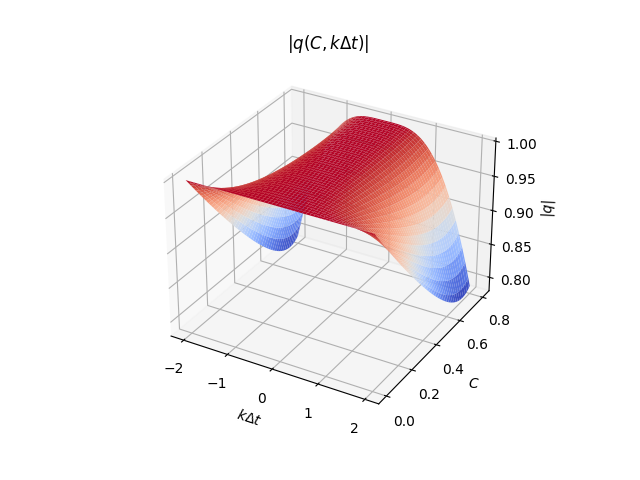

<IPython.core.display.Javascript object>


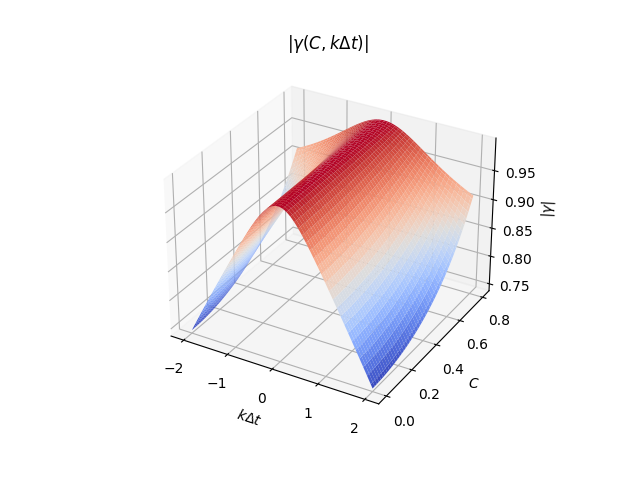

In [9]:
scheme = SchemeDZ1()
Visualizer.scheme_analysis(scheme)

## Начальные условия задачи

In [10]:
def initial_conditions_1(x):
    """
    U = exp(- x^2 / 2) + 2 * exp(- (x - 1) ^ 2 / 2)
    """
    from math import exp
    u1 = 1
    u2 = 2
    return u1 * exp(- x ** 2 / 2) + u2 * exp(- (x - 1) ** 2 / 2)


def initial_conditions_2(x):
    """
    u1 , 1 <= x <= 2
    """
    u1 = 1
    return u1 if 1 <= x <= 2 else 0


##############

step = 0.05
c = 0.5  # константа С в условии задачи
x0 = -4
xn = 5
t0 = 0
tn = 15

###############

scheme = SchemeDZ1(c)
border_conditions_periodic = BorderConditions(type_of_boundary_condition='periodic')  # periodic, outflow

grid1 = Grid(x0=x0, xn=xn, t0=t0, tn=tn, step_x=step, step_t=step)

diff_eq = DifferentialEquation(scheme=scheme,
                               initial_conditions=initial_conditions_1,
                               border_conditions=border_conditions_periodic,
                               grid=grid1)

## Первая функция, периодические граничные условия

c * dt / dx = 0.5


<IPython.core.display.Javascript object>


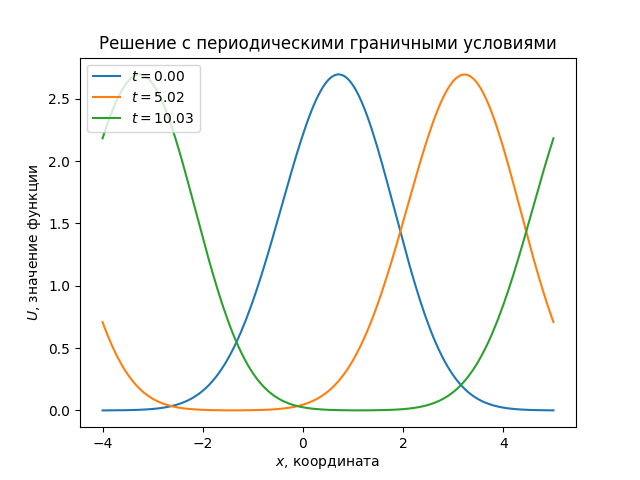

<IPython.core.display.Javascript object>


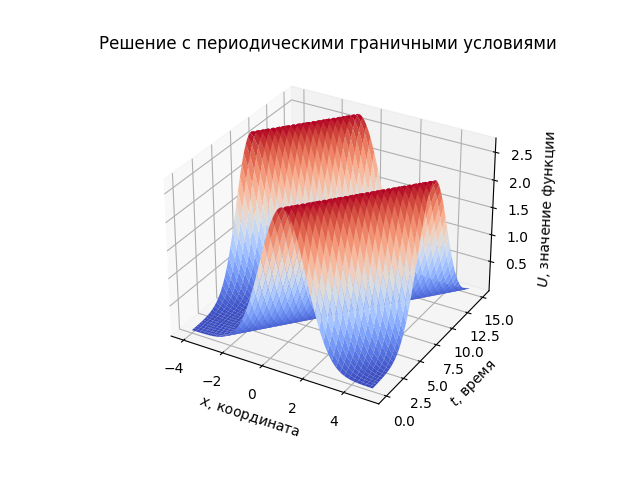

<IPython.core.display.Javascript object>


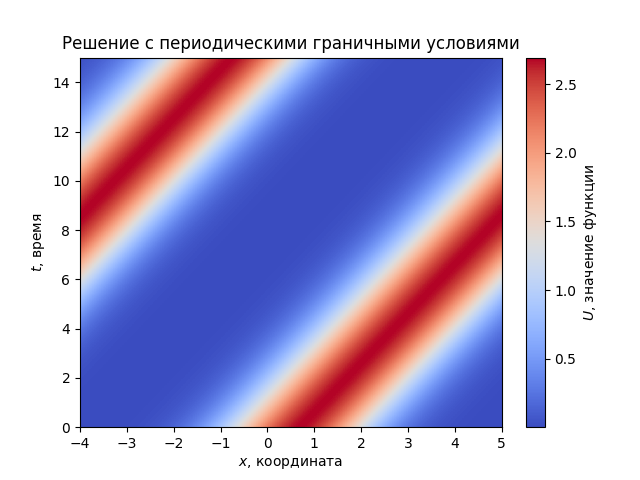

In [11]:
diff_eq.solve_eq()

Visualizer.plot_solution(diff_eq)  # temporary_layers=[0, 10, 70, 80, 90, 99], num_plot=3
Visualizer.plot_solution_surface(diff_eq)
Visualizer.x_t_diagram(diff_eq)

## Первая функция, граничные условия типа выток

c * dt / dx = 0.5


<IPython.core.display.Javascript object>


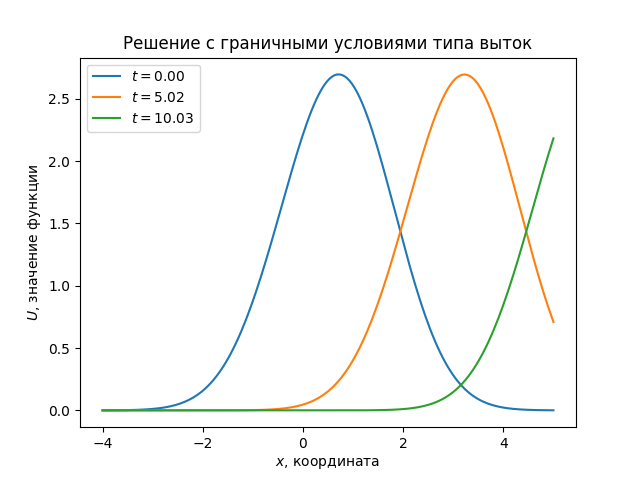

<IPython.core.display.Javascript object>


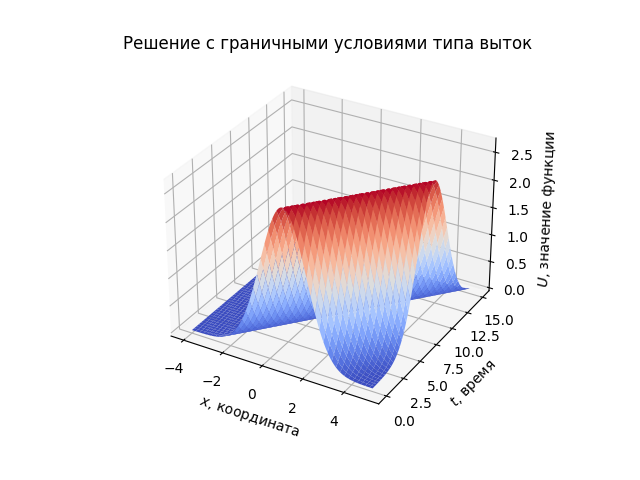

<IPython.core.display.Javascript object>


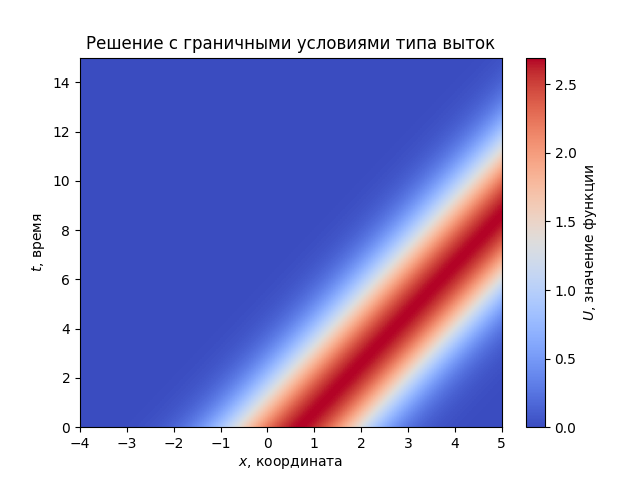

In [12]:
border_conditions_outflow = BorderConditions(type_of_boundary_condition='outflow')  # periodic, outflow
diff_eq.set_border_conditions(border_conditions_outflow)
diff_eq.solve_eq()

Visualizer.plot_solution(diff_eq)  # temporary_layers=[0, 10, 70, 80, 90, 99], num_plot=3
Visualizer.plot_solution_surface(diff_eq)
Visualizer.x_t_diagram(diff_eq)

## Вторая функция, периодические граничные условия

c * dt / dx = 0.5


<IPython.core.display.Javascript object>


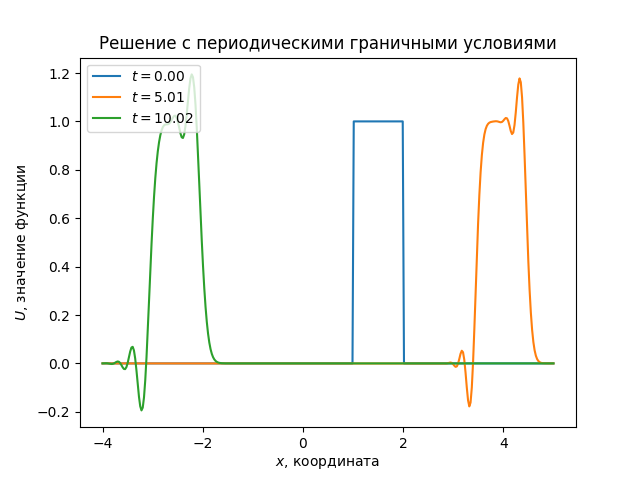

<IPython.core.display.Javascript object>


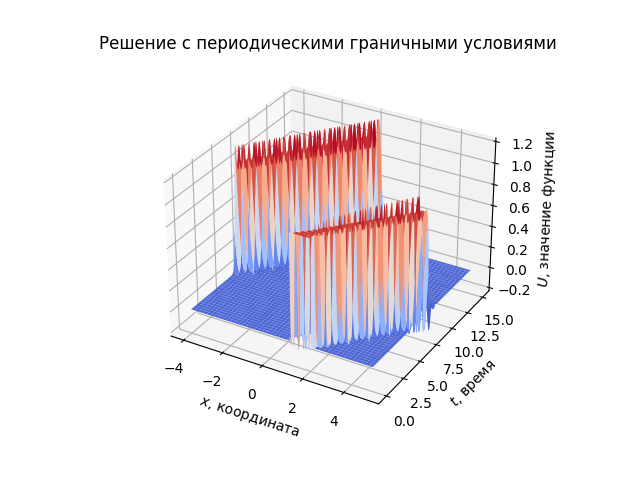

<IPython.core.display.Javascript object>


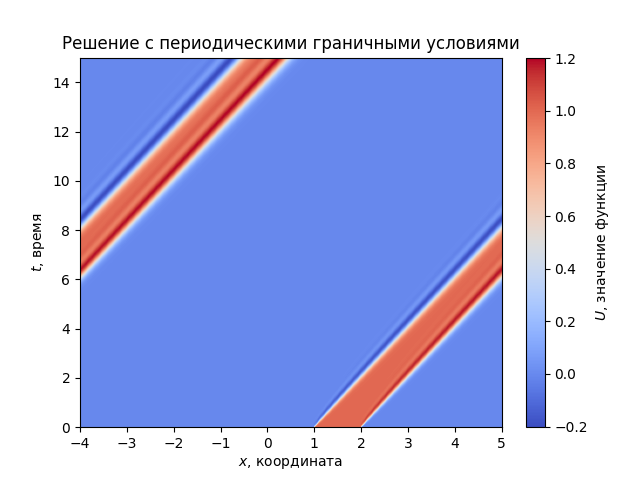

In [13]:
grid2 = Grid(x0=x0, xn=xn, t0=t0, tn=tn, step_x=step / 2, step_t=step / 2)
diff_eq.set_initial_conditions(initial_conditions_2)
diff_eq.set_grid(grid2)
diff_eq.set_border_conditions(border_conditions_periodic)

diff_eq.solve_eq()

Visualizer.plot_solution(diff_eq)  # temporary_layers=[0, 10, 70, 80, 90, 99], num_plot=3
Visualizer.plot_solution_surface(diff_eq)
Visualizer.x_t_diagram(diff_eq)

## Вторая функция, граничные условия типа выток

c * dt / dx = 0.5


<IPython.core.display.Javascript object>


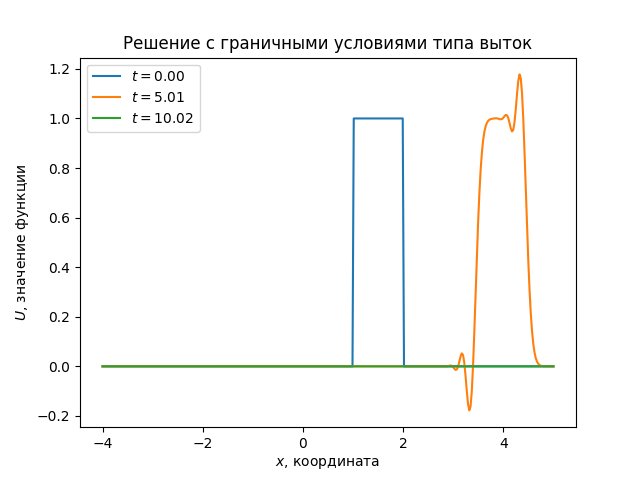

<IPython.core.display.Javascript object>


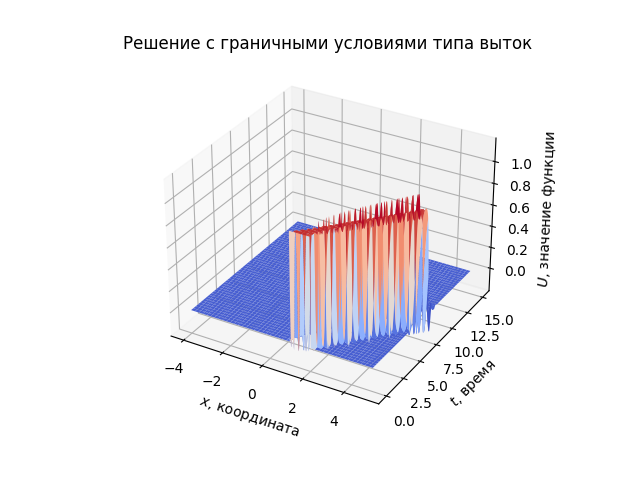

<IPython.core.display.Javascript object>


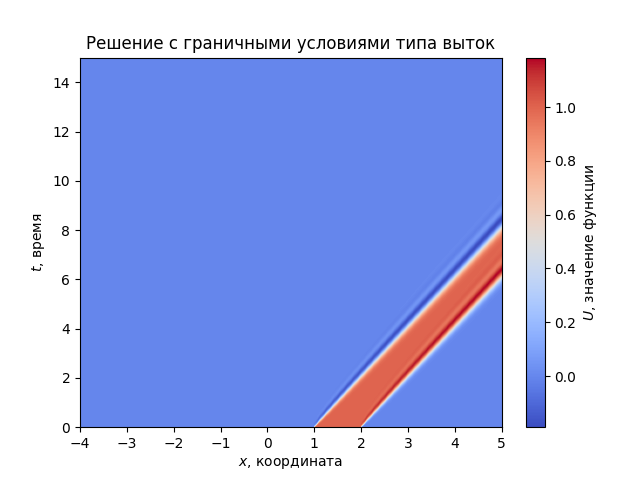

In [14]:
diff_eq.set_border_conditions(border_conditions_outflow)
diff_eq.solve_eq()

Visualizer.plot_solution(diff_eq)  # temporary_layers=[0, 10, 70, 80, 90, 99], num_plot=3
Visualizer.plot_solution_surface(diff_eq)
Visualizer.x_t_diagram(diff_eq)
